In [4]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.

In [11]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

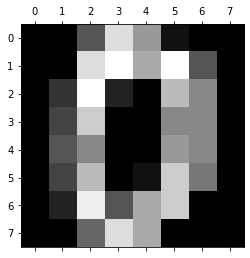

In [12]:
plt.matshow(digits.images[0])
plt.show()

# 2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [15]:
X = digits.images.reshape(digits.images.shape[0], -1)
y = digits.target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.20)

In [32]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_predict = model_lr.predict(X_test)
print('Accuracy score:', metrics.accuracy_score(y_test,y_predict))

Accuracy score: 0.95


E:\MachineLearning\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.

In [33]:
model_pca = PCA(n_components=10)
model_pca.fit(images)

PCA(n_components=10)

In [34]:
model_pca.fit(X_train, y_train)


PCA(n_components=10)

In [35]:
print('Variation Ratio:', model_pca.explained_variance_ratio_)

Variation Ratio: [0.14659533 0.13563025 0.11901049 0.08581575 0.05884243 0.04888294
 0.04350605 0.0369122  0.03334093 0.03064316]


# 4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.

In [36]:
X_train_pca=model_pca.transform(X_train)
X_test_pca=model_pca.transform(X_test)

In [37]:
model_lr_pca = LogisticRegression()
model_lr_pca.fit(X_train_pca, y_train)
y_predict_pca = model_lr_pca.predict(X_test_pca)
print('Accuracy score:', metrics.accuracy_score(y_test,y_predict_pca))

Accuracy score: 0.9305555555555556


E:\MachineLearning\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

In [39]:
cf_metrics = metrics.confusion_matrix(y_predict_pca, y_test)
#classification_report = metrics.classification_report(y_predict_pca, y_test)

In [41]:
print(cf_metrics)

[[36  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  1  2]
 [ 0  0 34  0  0  0  0  0  2  0]
 [ 0  0  0 38  0  1  0  0  0  0]
 [ 1  1  0  0 31  0  0  1  0  0]
 [ 0  2  0  0  0 28  0  0  0  2]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  1  0  1  0  0 30  2]
 [ 0  0  0  1  2  2  0  1  0 33]]


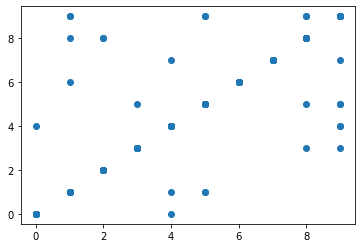

In [44]:
plt.scatter(y_predict_pca,y_test)